In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from classification_workflow import *
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns

In [2]:
farm = pd.read_csv("farm_data_train.csv")
X = farm.drop(['DIFF'],axis=1) # 'R17','R32', R14, R2
y = farm['DIFF'] #Target
from sklearn.model_selection import train_test_split
import random
#random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=200)

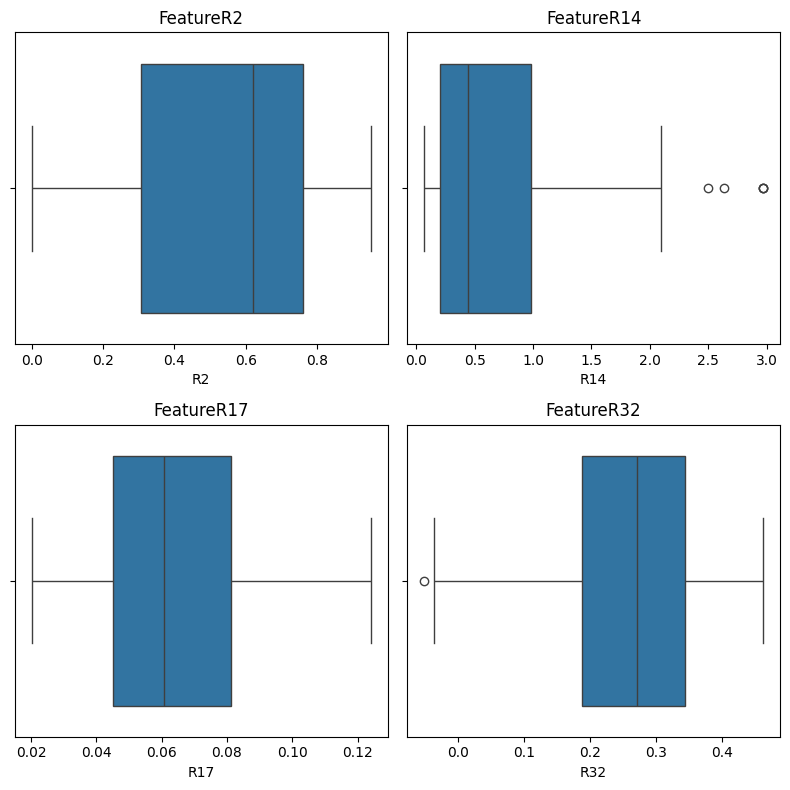

In [3]:
num_feature = ['R2', 'R14', 'R17', 'R32']
num_rows = 2
num_columns = 2
fig, axes = plt.subplots(num_rows, num_columns, figsize =(8, 8))
axes = axes.flatten()
for i in range(len(num_feature), len(axes)):
    fig.delaxes(axes[i])

for i in range (len(num_feature)):
    sns.boxplot(data =X_test, x=X_test[num_feature[i]], ax = axes[i])
    axes[i].set_title(f"Feature{num_feature[i]}")

plt.tight_layout()
plt.show()

In [4]:
import scipy
import math
numerical_features = ['R2', 'R14', 'R17', 'R32']
dataScaled_x= farm
#dataScaled_y = farm['R14']

#Coef de skewness
def highly_skewed_data(numerical_features, dataScaled):
    transform_cols=[]
    for column in numerical_features:
        skew= scipy.stats.skew(dataScaled[column], axis=0)
        if skew>=0.8 or skew<=-0.8:
            transform_cols.append(column)
    return transform_cols

transform_cols_x = highly_skewed_data(numerical_features, dataScaled_x)
#transform_cols_y = highly_skewed_data(['Sal'], dataScaled_y)
print(transform_cols_x)

#Renaming the columns in transform_cols 
#def take_log_col(col):
 #   if col in transform_cols_x or col in transform_cols_y: return col + '_log1p'
  #  else: return col

#applying the log transformation to our training and testing data
def add_log1p_col(train_copy, transform_cols):
    for col in transform_cols:
        #col_log1p = col + '_log1p'
        train_copy[col] = train_copy[col].apply(math.log1p)


add_log1p_col(X_train, transform_cols_x)
#add_log1p_col(Y, transform_cols_y)
add_log1p_col(X_test, transform_cols_x)

['R14']


In [5]:
data = pd.read_csv("farm_data_train.csv")
data.iloc[657]

R2      0.36500
R14     0.08061
R17     0.05380
R32     0.15200
DIFF    0.00000
Name: 657, dtype: float64

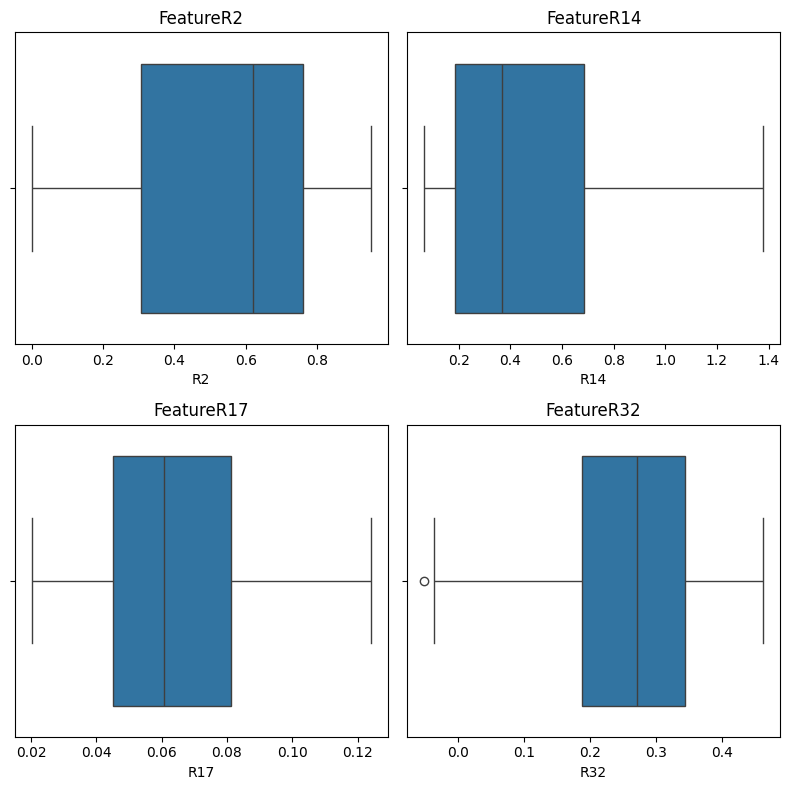

In [6]:
num_feature = ['R2', 'R14', 'R17', 'R32']
num_rows = 2
num_columns = 2
fig, axes = plt.subplots(num_rows, num_columns, figsize =(8, 8))
axes = axes.flatten()
for i in range(len(num_feature), len(axes)):
    fig.delaxes(axes[i])

for i in range (len(num_feature)):
    sns.boxplot(data =X_test, x=X_test[num_feature[i]], ax = axes[i])
    axes[i].set_title(f"Feature{num_feature[i]}")

plt.tight_layout()
plt.show()

In [7]:
X_test

R2       R14     R17      R32
657  0.365  0.077526  0.0538  0.15200
649  0.783  0.066658  0.0954  0.45050
551  0.789  0.066658  0.0414  0.45050
555  0.940  0.171176  0.0646  0.33730
259  0.479  0.176555  0.0792  0.14980
..     ...       ...     ...      ...
541  0.186  0.436382  0.1240  0.11240
645  0.800  0.397836  0.0765  0.33490
383  0.000  0.752312  0.0466  0.02351
470  0.919  0.146694  0.0300  0.32930
217  0.745  0.414094  0.0586  0.43130

[189 rows x 4 columns]

In [8]:

dict_models = { 'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 5]
        }
}
}

Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


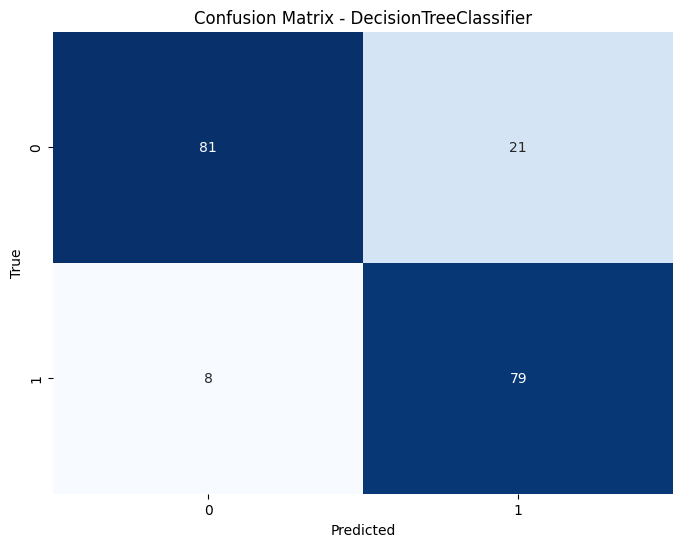

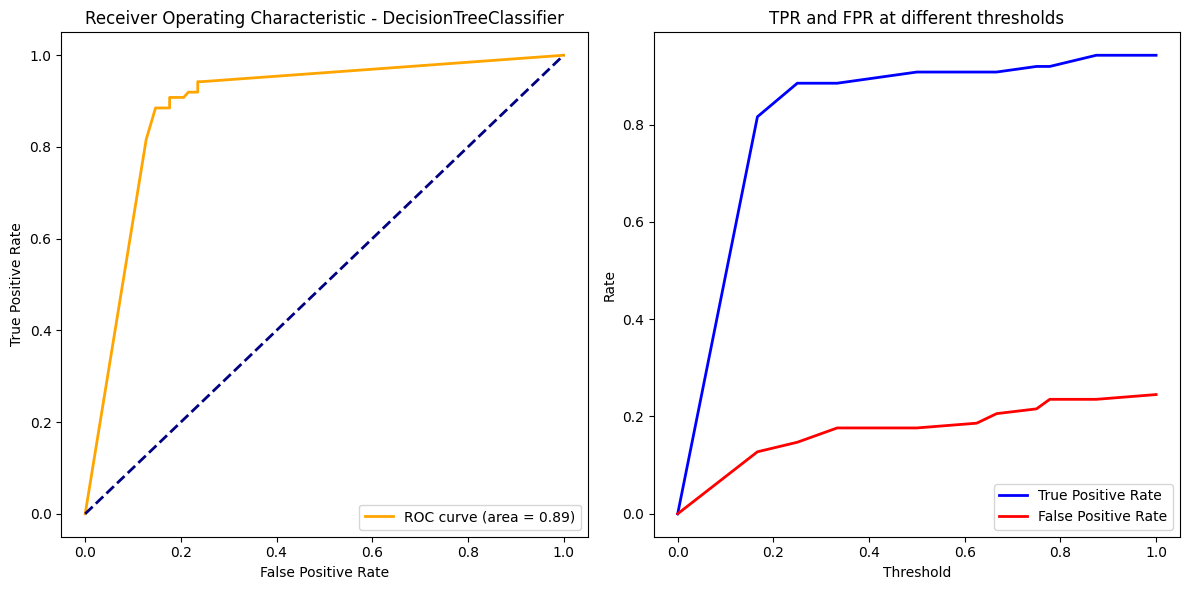

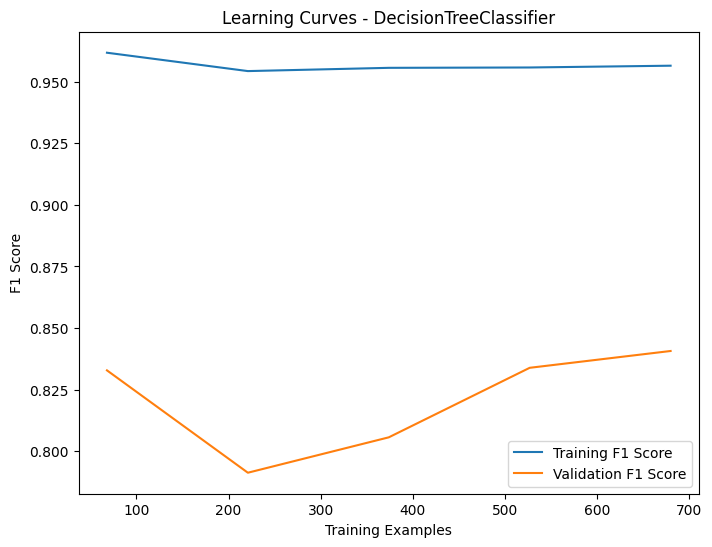

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:21<00:00, 21.66s/it]

Model: DecisionTreeClassifier
Accuracy: 0.8465608465608465
Precision: 0.79
Recall: 0.9080459770114943
ROC-AUC: 0.8908609420779806




In [9]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=10) # avant 40 10 90%, 10 10 200  91%, 
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on farm data(%)')


## Scaling 


In [10]:
minmax, standard, robust = standardization(farm)

Xr = robust # 'R17','R32', R14, R2
Yr = farm['DIFF'] #Target


Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


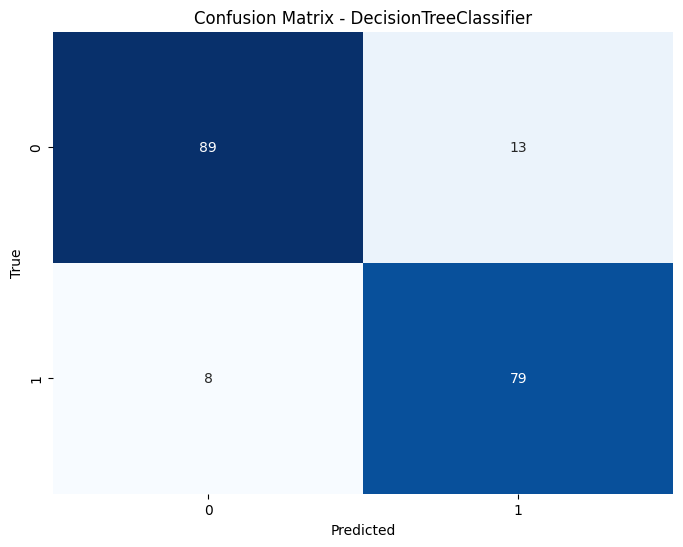

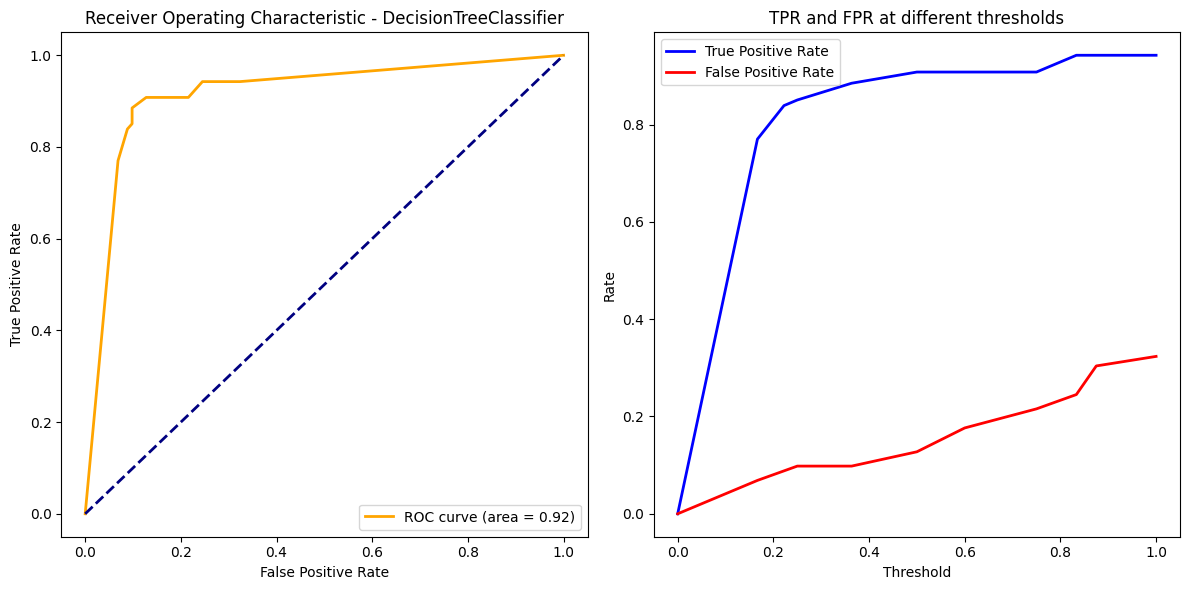

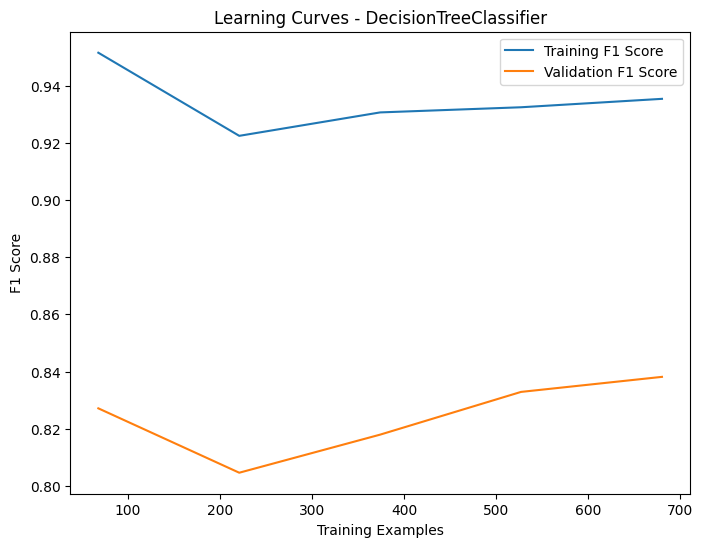

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:12<00:00, 12.03s/it]

Model: DecisionTreeClassifier
Accuracy: 0.8888888888888888
Precision: 0.8586956521739131
Recall: 0.9080459770114943
ROC-AUC: 0.9151453684922246




In [11]:
from sklearn.model_selection import train_test_split
Xr_train,Xr_test,yr_train,yr_test = train_test_split(Xr,Yr,test_size=.20,random_state=200)
cvr = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
display_results(dict_models, Xr_train, yr_train, Xr_test, yr_test, cvr, 'f1 scoring on farm data(%)')


Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


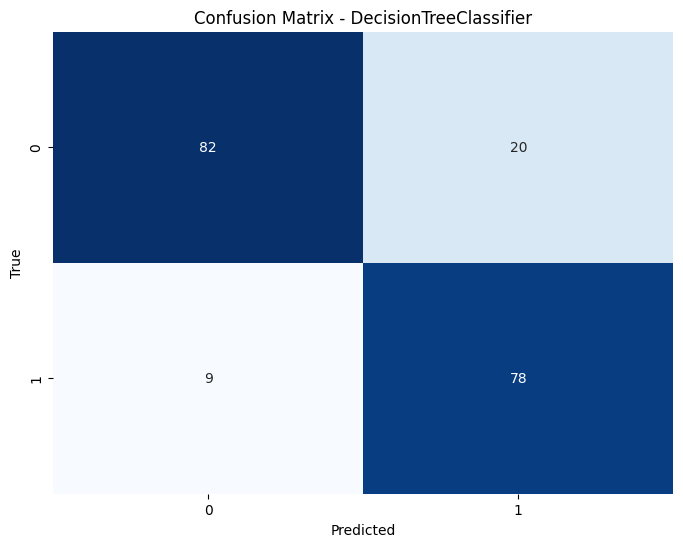

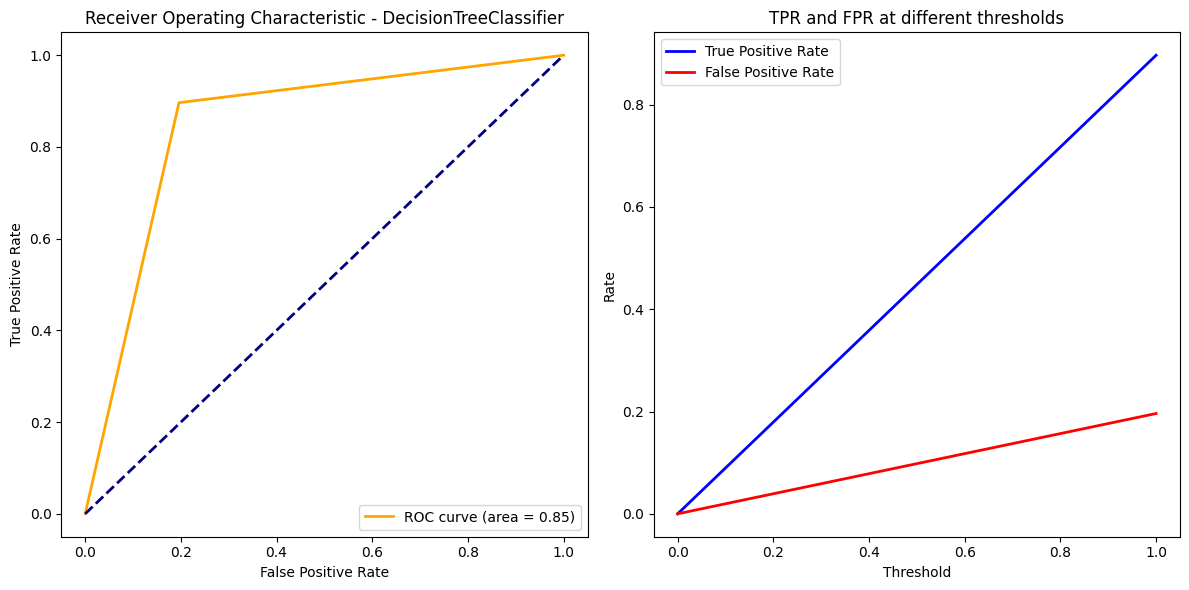

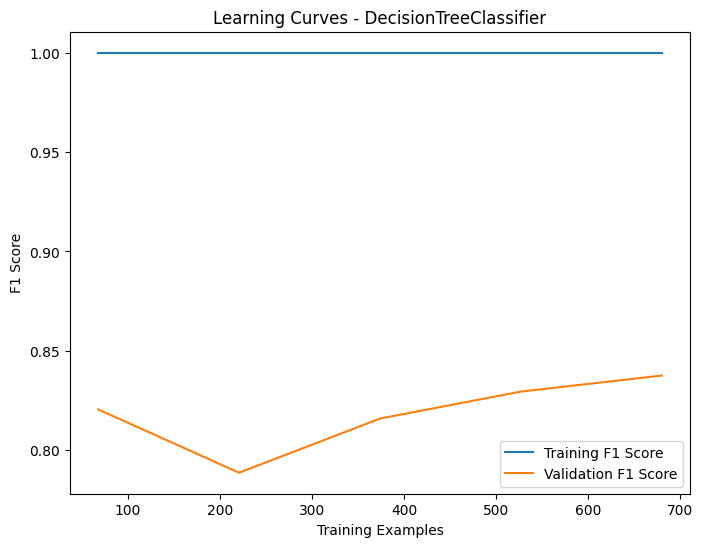

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:10<00:00, 10.10s/it]

Model: DecisionTreeClassifier
Accuracy: 0.8465608465608465
Precision: 0.7959183673469388
Recall: 0.896551724137931
ROC-AUC: 0.850236646382691




In [16]:
Xs = standard # 'R17','R32', R14, R2
Ys = farm['DIFF'] #Target

from sklearn.model_selection import train_test_split
Xs_train,Xs_test,ys_train,ys_test = train_test_split(Xs,Ys,test_size=.20,random_state=200)
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
display_results(dict_models, Xs_train, ys_train, Xs_test, ys_test, cvs, 'f1 scoring on farm data(%)')



Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


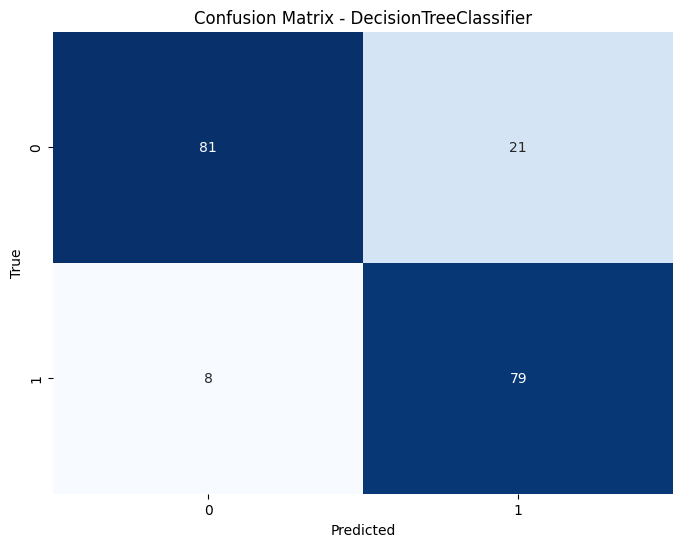

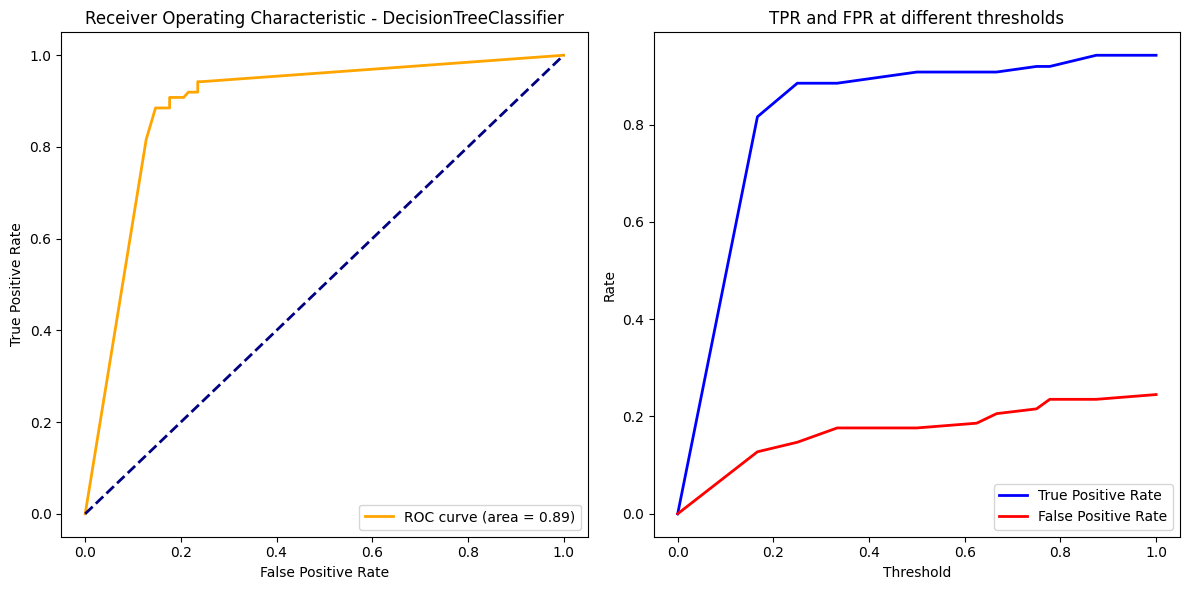

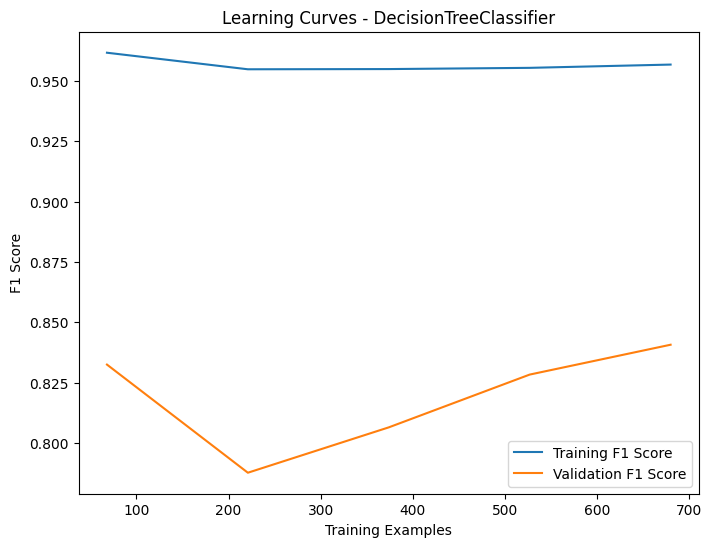

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:13<00:00, 13.43s/it]

Model: DecisionTreeClassifier
Accuracy: 0.8465608465608465
Precision: 0.79
Recall: 0.9080459770114943
ROC-AUC: 0.8908609420779806




In [13]:
Xm = minmax # 'R17','R32', R14, R2
Ym = farm['DIFF'] #Target

from sklearn.model_selection import train_test_split
Xm_train,Xm_test,ym_train,ym_test = train_test_split(Xm,Ym,test_size=.20,random_state=200)
cvm = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
display_results(dict_models, Xm_train, ym_train, Xm_test, ym_test, cvm, 'f1 scoring on farm data(%)')

Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


c:\Users\naim\Desktop\Binary-classification\classification_workflow.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


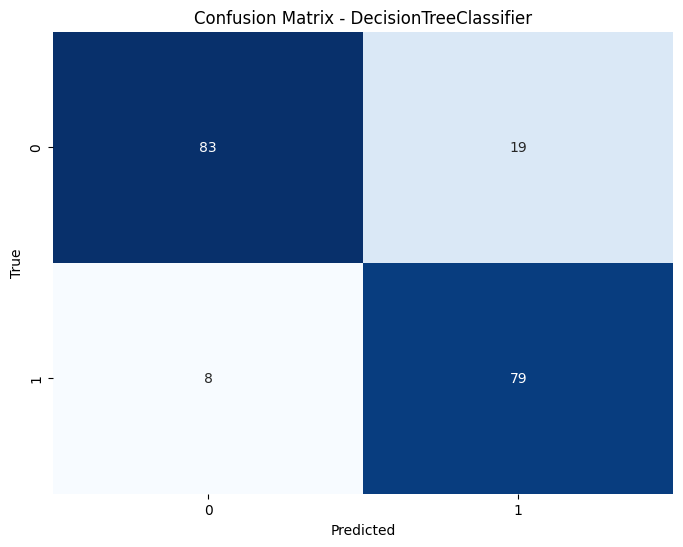

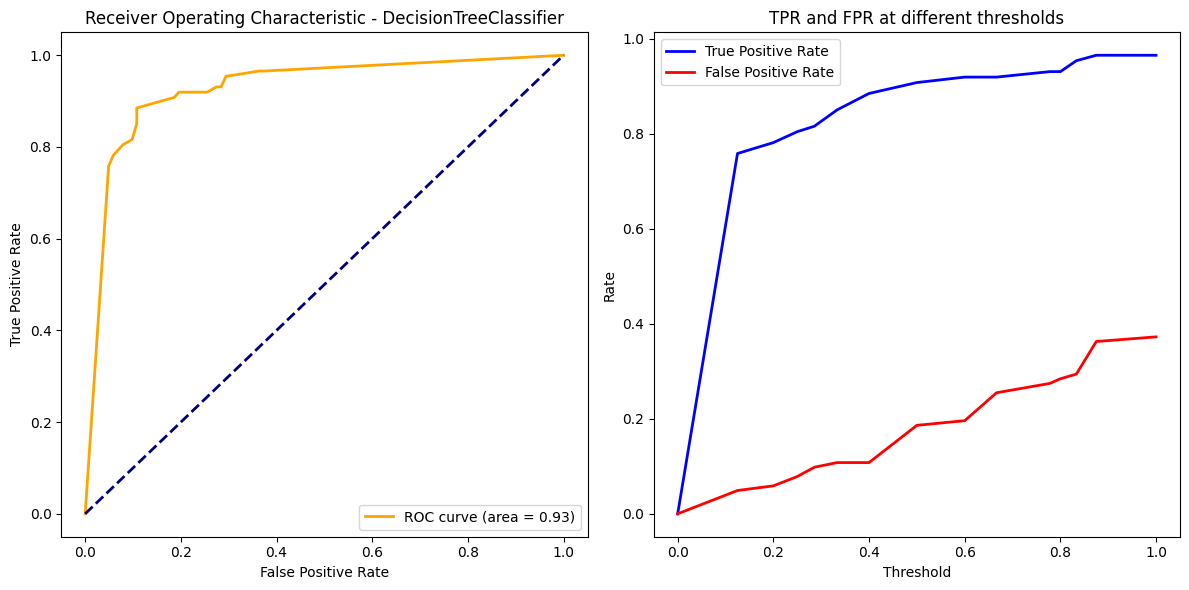

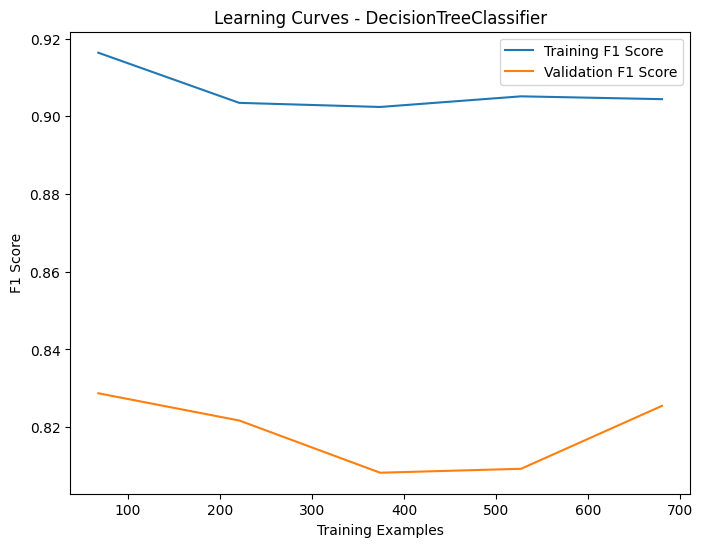

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:11<00:00, 12.00s/it]

Model: DecisionTreeClassifier
Accuracy: 0.8571428571428571
Precision: 0.8061224489795918
Recall: 0.9080459770114943
ROC-AUC: 0.927597475771918




In [14]:
X1 = farm.drop(['DIFF', 'R17','R32'], axis=1)   # 'R17','R32', R14, R2
Y1 = farm['DIFF'] #Target

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=.20,random_state=200)
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
display_results(dict_models, X1_train, y1_train, X1_test, y1_test, cvs, 'f1 scoring on farm data(%)')


Comment: Cette méthode est sensible au type de scaling qu'on utilise